In [225]:
import numpy as np
import pandas as pd

In [226]:
import os

In [233]:
languages = ["asm","ben","eng","guj","hin","kan","mal","mar","odi","pun","tam","tel"]
classes = []
for i in range(12):
    currDir = f"combinedData/{languages[i]}/YT_test"
    df = pd.read_csv(os.path.join(currDir,"combinedData.csv"),header=None)
    classes.append(df)



In [240]:
languages = ["asm","ben","eng","guj","hin","kan","mal","mar","odi","pun","tam","tel"]
classesDup = []
for i in range(12):
    currDir = f"combinedData/{languages[i]}/PB_test"
    df = pd.read_csv(os.path.join(currDir,"combinedData.csv"),header=None)
    classesDup.append(df)

In [228]:
import matplotlib.pyplot as plt

In [ ]:
plt.hist(classes[0].iloc[:,i],density=True,bins=100)
plt.hist(classes[0].iloc[:,i],density=True,bins=100)

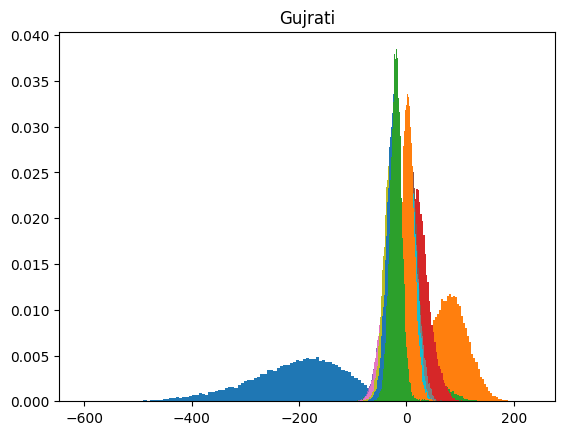

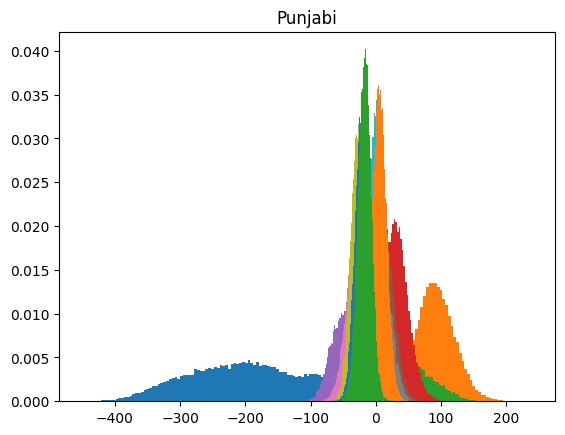

In [244]:

for i in range(13):
    plt.title("Gujrati")
    # plt.text("Cumulative plot of first 13 features")
    plt.hist(classesDup[3].iloc[:,i],density=True,bins=100)
plt.show()
for i in range(13):
    plt.title("Punjabi")
    # plt.text("Cumulative plot of first 13 features")
    plt.hist(classesDup[9].iloc[:,i],density=True,bins=100)
plt.show()

In [232]:
classes[0].shape

(84631, 39)

In [230]:
from sklearn.mixture import GaussianMixture as GMM

In [231]:
gaussianModels =[]
for data in classes:
    gmmModel = GMM(n_components=14).fit(data)
    gaussianModels.append(gmmModel)

In [98]:
import pickle
modelDirectory = "models"
for i in range(12):
    with open(f"{os.path.join(modelDirectory,languages[i])}","wb") as objFile:
        pickle.dump(gaussianModels[i],objFile)

In [198]:


# predictions = 

In [160]:
gaussianModels[0].means_.shape

(12, 39)

In [142]:
import math

In [169]:
def getProbabDensity(featureVector,mu_vector,covMatrix):
    invCovMat = np.linalg.inv(covMatrix)
    numerator = math.exp(-0.5 * np.transpose(featureVector - mu_vector) @ invCovMat @ (featureVector - mu_vector))
    denominator = math.pow(2*math.pi,0.5*featureVector.shape[0]) * np.linalg.det(covMatrix)
    return numerator/denominator

In [153]:
testAsmData = pd.read_csv("combinedData/asm/PB_test/combinedData.csv",header=None)
muClass0=gmmModel.means_
covClass0=gmmModel.covariances_
featureVector = np.transpose(testAsmData.iloc[0].values).reshape((-1,1))
# pr = getProbabDensity(featureVector,muClass0,covClass0)
print(muClass0.shape)
# print(pr)

(39, 39)


In [177]:
dfMain=pd.DataFrame()
for l in languages:
    readDir = f"combinedData/{l}/PB_test/combinedData.csv" 
    with open(readDir,"r") as dataFile:
        dfTemp = pd.read_csv(dataFile,encoding="utf-16",header=None)
        print(f"Adding data of {dataFile}")
        dfMain = pd.concat([dfMain,dfTemp],ignore_index=True)

Adding data of <_io.TextIOWrapper name='combinedData/asm/PB_test/combinedData.csv' mode='r' encoding='UTF-8'>
Adding data of <_io.TextIOWrapper name='combinedData/ben/PB_test/combinedData.csv' mode='r' encoding='UTF-8'>
Adding data of <_io.TextIOWrapper name='combinedData/eng/PB_test/combinedData.csv' mode='r' encoding='UTF-8'>
Adding data of <_io.TextIOWrapper name='combinedData/guj/PB_test/combinedData.csv' mode='r' encoding='UTF-8'>
Adding data of <_io.TextIOWrapper name='combinedData/hin/PB_test/combinedData.csv' mode='r' encoding='UTF-8'>
Adding data of <_io.TextIOWrapper name='combinedData/kan/PB_test/combinedData.csv' mode='r' encoding='UTF-8'>
Adding data of <_io.TextIOWrapper name='combinedData/mal/PB_test/combinedData.csv' mode='r' encoding='UTF-8'>
Adding data of <_io.TextIOWrapper name='combinedData/mar/PB_test/combinedData.csv' mode='r' encoding='UTF-8'>
Adding data of <_io.TextIOWrapper name='combinedData/odi/PB_test/combinedData.csv' mode='r' encoding='UTF-8'>
Adding dat

In [194]:
print("Fitting model...")
gmmTest = GMM(n_components=13).fit(classes[0].values)
print("Model trainesd")

Fitting model...
Model trainesd


In [181]:
print(gmmTest.means_.shape)

(39, 39)


In [ ]:
testBenData = pd.read_csv("combinedData/ben/PB_test/combinedData.csv",header=None)
testAsmData = pd.read_csv("combinedData/asm/PB_test/combinedData.csv")
testEnData = pd.read_csv("combinedData/eng/PB_test/combinedData.csv",header=None)
testHinData = pd.read_csv("combinedData/hin/PB_test/combinedData.csv",header=None)
muClass0=gmmTest.means_
covClass0=gmmTest.covariances_
featureVector1 = np.transpose(testBenData.iloc[0].values).reshape((-1,1))
featureVector2 = np.transpose(testAsmData.iloc[0].values).reshape((-1,1))
featureVector3 = np.transpose(testEnData.iloc[0].values).reshape((-1,1))
featureVector4 = np.transpose(testHinData.iloc[0].values).reshape((-1,1))
# plt.plot(testAsmData.values)
# plt.show()



for model in gaussianModels:
    # tdata = pd.read_csv(f"combinedData/{l}/PB_test/combinedData.csv",header=None)
    # fVec = tdata.iloc[2].values.reshape((-1,1))
    print(model.score(np.transpose(featureVector2)))

# pr= getProbabDensity(featureVector,muClass0[4].reshape((-1,1)),covClass0[4])
# print(math.log(pr))

# print(gmmTest.predict(np.transpose(featureVector)))
# print(featureVector.shape)

# predictionsVal = gmmTest.predict(testAsmData.values)
# for i in predictionsVal:
#     print(i)

# print(muClass0[0].reshape((-1,1)).shape,covClass0[0].shape)

In [ ]:
gaussianModelsMain = []
for files in os.listdir("models"):
    f = open(f"models/{files}","rb")
    gaussianModelsMain.append(pickle.load(f))

testAsmData = pd.read_csv("combinedData/asm/PB_test/combinedData.csv")
featureVector2 = np.transpose(testAsmData.iloc[0].values).reshape((-1,1))
# print(len(gaussianModelsMain))
for model in gaussianModelsMain:
    print(model)
    print(model.score_samples(np.transpose(featureVector2)))